## Tugas 2
- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya

- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
1. Menggunakan data spam.csv
2. Fitur TF-IDF dengan mengaktifkan stop_words
3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

### CountrVectorizer

In [ ]:
# Gunakan Data Spam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
from google.colab import drive
drive.mount('/content/drive')

# Preprocess
df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv', encoding='latin-1')
df = df.drop(df.iloc[:,2:], axis=1)
df = df.rename(columns={'v1': 'Labels', 'v2': 'SMS'})
df.head()

# Canvas stuff
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore', category=FutureWarning)

# Preprocessing Label
df['Labels'] = df['Labels'].map({'ham': 0, 'spam': 1})
print("\nLabel 'ham' diubah menjadi 0, 'spam' menjadi 1.")

# Pisahkan Fitur (X) dan Target (y)
X = df['SMS']
y = df['Labels']

# Train-Test Split dengan 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\n{len(X_train)} data train, {len(X_test)} data test.")

Mounted at /content/drive

Label 'ham' diubah menjadi 0, 'spam' menjadi 1.

4457 data train, 1115 data test.


In [ ]:
print("\nMembuat model CountVectorizer (stop_words='english')...")

# CountVectorizer dengan stop_words='english'dan buang kata-kata umum
vectorizer = CountVectorizer(stop_words='english')

# Fit dan transform data training
# Model "belajar" kosa kata (vocabulary) dari data training
X_train_vec = vectorizer.fit_transform(X_train)

# Transform data testing dengan vocabulary yang sama dari data train
X_test_vec = vectorizer.transform(X_test)

print(f"Unique Vocabulary: {len(vectorizer.get_feature_names_out())} kata.")

# Train
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)


Membuat model CountVectorizer (stop_words='english')...
Unique Vocabulary: 7440 kata.


MultinomialNB()


Akurasi Model: 0.9839 (atau 98.39%)

Classification Report:
              precision    recall  f1-score   support

     Ham (0)       0.99      0.99      0.99       966
    Spam (1)       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:


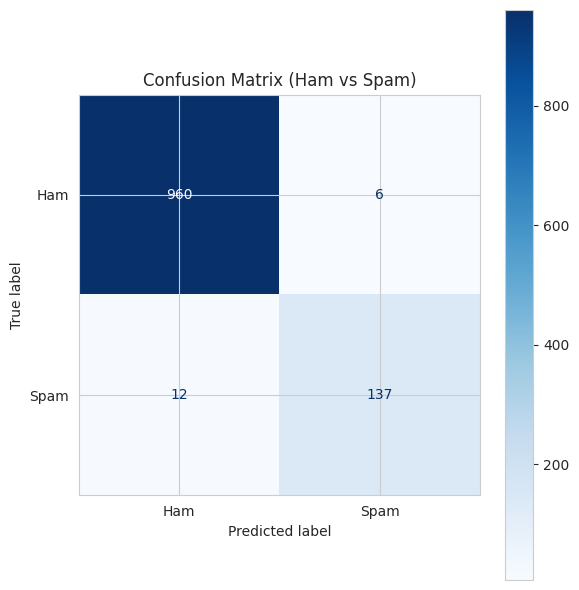

In [ ]:
# Prediksi data test
y_pred = mnb.predict(X_test_vec)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f} (atau {accuracy*100:.2f}%)")

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
# 0 = ham, 1 = spam
report = classification_report(y_test, y_pred, target_names=['Ham (0)', 'Spam (1)'])
print(report)

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("Confusion Matrix (Ham vs Spam)")
disp.plot(ax=ax, cmap='Blues')
plt.tight_layout()

# Simpan plot
plt.show()

### TF-IDF

In [ ]:
# Do it all over again...
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore', category=FutureWarning)

df = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv', encoding='latin-1')
df = df.drop(df.iloc[:,2:], axis=1)
df = df.rename(columns={'v1': 'Labels', 'v2': 'SMS'})
df['Labels'] = df['Labels'].map({'ham': 0, 'spam': 1})
X = df['SMS']
y = df['Labels']

# Train-Test Split (WAJIB SAMA: random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
vectorizer_cv = CountVectorizer(stop_words='english')
X_train_cv = vectorizer_cv.fit_transform(X_train)
X_test_cv = vectorizer_cv.transform(X_test)

mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)
y_pred_cv = mnb_cv.predict(X_test_cv)
accuracy_cv = accuracy_score(y_test, y_pred_cv)

print(f"Akurasi (CountVectorizer): {accuracy_cv:.4f}")

Akurasi (CountVectorizer): 0.9839


In [ ]:
print("Membuat model TfidfVectorizer (stop_words='english')...")

# Inisialisasi TfidfVectorizer/TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words='english')

# Fit dan transform
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

print(f"Ukuran Vocabulary (TF-IDF): {len(vectorizer_tfidf.get_feature_names_out())}")

# Melatih model MNB dengan data TF-IDF
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

Membuat model TfidfVectorizer (stop_words='english')...
Ukuran Vocabulary (TF-IDF): 7440


MultinomialNB()

Hasil akurasi data train (TF-IDF): 0.9845
Hasil akurasi data test (TF-IDF): 0.9686

Classification Report (TF-IDF):
              precision    recall  f1-score   support

     Ham (0)       0.97      1.00      0.98       966
    Spam (1)       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Confusion Matrix (TF-IDF):


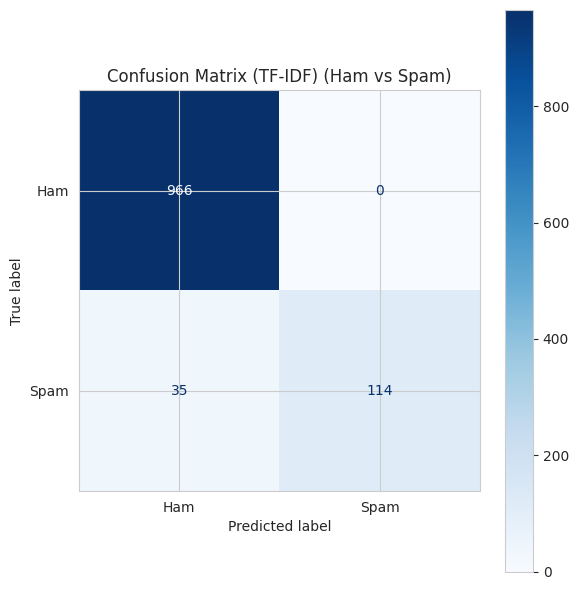

In [ ]:
y_pred_train_tfidf = mnb_tfidf.predict(X_train_tfidf)

# Evaluasi akurasi data training
acc_train_tfidf = accuracy_score(y_train, y_pred_train_tfidf)
print(f'Hasil akurasi data train (TF-IDF): {acc_train_tfidf:.4f}')

# Prediksi dengan data testing
y_pred_test_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Evaluasi akurasi
acc_test_tfidf = accuracy_score(y_test, y_pred_test_tfidf)
print(f'Hasil akurasi data test (TF-IDF): {acc_test_tfidf:.4f}')

# Classification Report
print("\nClassification Report (TF-IDF):")
report_tfidf = classification_report(y_test, y_pred_test_tfidf, target_names=['Ham (0)', 'Spam (1)'])
print(report_tfidf)

# Confusion Matrix for TF-IDF
print("\nConfusion Matrix (TF-IDF):")
cm_tfidf = confusion_matrix(y_test, y_pred_test_tfidf)

# Plot Confusion Matrix for TF-IDF
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=cm_tfidf, display_labels=['Ham', 'Spam'])
fig_tfidf, ax_tfidf = plt.subplots(figsize=(6, 6))
ax_tfidf.set_title("Confusion Matrix (TF-IDF) (Ham vs Spam)")
disp_tfidf.plot(ax=ax_tfidf, cmap='Blues')
plt.tight_layout()
plt.show()

### Perbandingan dan Kesimpulan

In [ ]:
print("\n--- Perbandingan Hasil Akurasi ---")
print(f"Akurasi Model (CountVectorizer): {accuracy_cv:.4f}")
print(f"Akurasi Model (TF-IDF): {acc_test_tfidf:.4f}")


--- Perbandingan Hasil Akurasi ---
Akurasi Model (CountVectorizer): 0.9839
Akurasi Model (TF-IDF): 0.9686


Dari segi akurasi secara global, CountVectorizer mempunyai akurasi yang lebih tinggi dibandingkan TF-IDF. Dari segi confusion matrix, TF-IDF dapat lebih menanggapi ham lebih baik karena tidak ada miss pada ham, tapi terlihat bahwa ada bias terhadap ham, karena ada 35 data spam yang dianggap ham. Sedangkan untuk CountVectorizer, ada 18 miss/meleset dengan 12 miss pada spam yang dianggap ham, dan 6 data ham yang dianggap spam.

Kesimpulan yang dapat diambil adalah, pada kasus `spam.csv`, lebih baik menggunakan fitur CountVectorizer dengan mengaktifkan stop words karena akurasinya yang lebih tinggi dan miss data yang lebih jarang terjadi.